# Optimal control of spin ensemble in a cavity

## The spin-cavity “Tavis-Cummings” Hamiltonian

The Tavis-Cummings (TC) Hamiltonian is given by the following:

$\mathcal{H}=\frac{1}{2} \sum_{i=1}^{N} \hbar \omega_{i} \sigma_{i}^{z}+\hbar \omega_{c} \hat{a}_{c}^{\dagger} \hat{a}_{c}+\sum_{i=1}^{N} \hbar g\left(\sigma_{i}^{+} \hat{a}_{c}+\sigma_{i}^{-} \hat{a}_{c}^{\dagger}\right)$

by only considering the spin, in the krylov basis this can be represented as a matrix:

$\mathcal{H}_{s}^{e f}=\left(\begin{array}{ccccccc}{-\eta-\Omega} & {0} & {0} & {0} & {0} & {\cdot} & {0} & {0} \\ {0} & {-\eta} & {\sqrt{2} \sigma} & {0} & {0} & {\cdot} & {0} & {0} \\ {0} & {\sqrt{2} \sigma} & {-\eta} & {\sqrt{3} \sigma} & {0} & {\cdot} & {0} & {0} \\ {0} & {0} & {\sqrt{3} \sigma} & {-\eta} & {\sqrt{4} \sigma} & {\cdot} & {0} & {0} \\ {0} & {0} & {0} & {\sqrt{4} \sigma} & {-\eta} & {\cdot} & {0} & {0} \\ {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} \\ {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} & {\cdot} \\ {0} & {0} & {0} & {0} & {0} & {\cdot} & {-\eta} & {\sqrt{k} \sigma} \\ {0} & {0} & {0} & {0} & {0} & {\cdot} & {\sqrt{k} \sigma} & {-\eta}\end{array}\right)$

where $η = \frac{N−2}{2}Ω$, $\Omega=\frac{1}{N} \sum_{i}^{N} \omega_{i}$ or the mean of the frequncies, $k$ is the kth dimension in the krylov sub-space and $σ$ is the standard deviation of the distrabution of the spin frequncies of the ensemble.

In [1]:
import scipy as sp
from scipy import linalg
from scipy import sparse
import matplotlib.pyplot as plt
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("") 

https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75

### The effective hamiltonian
Below is a funtion which generates the effective hamiltonian $H$, as well as the diganolised Hamiltonian $H_D$.

In [ ]:
def H_effective(k, Omega, Sigma):
    Eta = (k-2)*0.5*Omega
    beta = []
    for i in range(k-1):
        beta.append(sp.sqrt(i+1)*Sigma)
    
    diag = [beta,beta]
    M = sp.sparse.diags(diag,[-1,1]).toarray()
    sp.fill_diagonal(M, -Eta)
    
    M[1,0] = 0
    M[0,1] = 0
    M[0,0] = -1*Eta - Omega
    
    return M
    
def Hamiltonian_diag(k,omega,sigma):
    H = H_effective(k,omega,sigma)
    w1,v1 = sp.linalg.eig(H)
    M = sp.matrix.conjugate(sp.transpose(v1))
    M_dag = v1  ## conjugate(transpose(M))
    H_diag= sp.matmul(sp.matmul(M,H),M_dag)
    return H_diag, M , M_dag 


    
def chi(k,omega, sigma, psi_0,t):
    extract = Hamiltonian_diag(k,omega,sigma)
    H_d = extract[0]
    M = extract[1]
    M_dag = extract[2]
    
    exponential = sp.zeros([len(H_d),len(H_d)],dtype = complex)
    

    for i in range(len(H_d)):
        exponential[i][i] = sp.exp(-1j*t*H_d[i][i])
        

    
    psi_0_bra = sp.matrix.conjugate(sp.transpose(psi_0))
    psi_t = sp.matmul(M,sp.matmul(sp.matmul(M_dag,psi_0),exponential))
    
    chi_rooted = sp.matmul(psi_0_bra,psi_t)
    

    return abs(chi_rooted)**2
    
def chi_plot(k,omega, sigma, psi_0,t_end):
    time = sp.linspace(0,t_end,1000)
    chi_list = []
    for i in range(len(time)):
        chi_list.append(chi(k,omega,sigma,psi_0,time[i]))
    plt.plot(time,chi_list,label = k,linewidth = 0.1)
    plt.xlabel("Time")
    plt.ylabel("$\chi^2$")
    plt.legend()
    
def chi_plot_multi(k_list,omega, sigma, psi_0_list,t_end):
    for i in range(len(k_list)):
        chi_plot(int(k_list[i]),omega, sigma, psi_0_list[i],t_end)
        
def psi(k):
    value = sp.zeros(int(k))
    value[1] = 1
    return value

def psi_list(k_list):
    value  = []
    for i in range(len(k_list)):
        value.append(psi(k_list[i]))
    return value
        

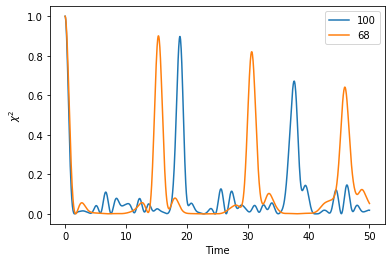

In [6]:
chi_plot(100,1,1,psi(100),50)
chi_plot(68,1,1,psi(68),50)

In [5]:
chi_plot(500,1,1,psi(500),10)
plt.title("500 Dimensions")

KeyboardInterrupt: 

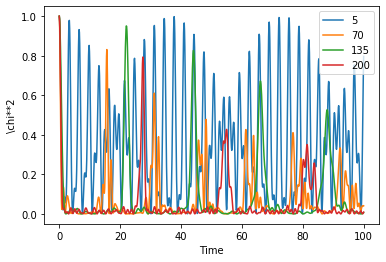

In [19]:
k_list = sp.linspace(5,200,4)
psi_0_list = psi_list(k_list)
chi_plot_multi(k_list,1,1, psi_0_list,100)
plt.savefig("200",dpi = 1000)

In [159]:
print(psi(4))

[0. 1. 0. 0.]


In [9]:
print(Hamiltonian_diag(5,1,1))

(array([[ 1.32842712e+00, -2.46487751e-16, -2.94913831e-15,
        -7.07804647e-16,  0.00000000e+00],
       [-2.27421539e-16, -5.00000000e-01,  3.66943846e-16,
         4.68489682e-16,  0.00000000e+00],
       [-2.80421814e-15,  2.22121369e-16, -4.32842712e+00,
        -4.45235606e-16,  0.00000000e+00],
       [-6.27588744e-16,  3.00896378e-16, -4.03563806e-16,
        -2.50000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.50000000e+00]]), array([[ 0.        , -0.26726124, -0.53452248, -0.65465367, -0.46291005],
       [ 0.        ,  0.65465367,  0.46291005, -0.26726124, -0.53452248],
       [ 0.        ,  0.26726124, -0.53452248,  0.65465367, -0.46291005],
       [ 0.        , -0.65465367,  0.46291005,  0.26726124, -0.53452248],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ]]), array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26726124,  0.65465367,  0.2672

In [11]:
H_diag, M , M_dag = Hamiltonian_diag(5,1,1)

In [12]:
H_diag

array([[ 1.32842712e+00, -2.46487751e-16, -2.94913831e-15,
        -7.07804647e-16,  0.00000000e+00],
       [-2.27421539e-16, -5.00000000e-01,  3.66943846e-16,
         4.68489682e-16,  0.00000000e+00],
       [-2.80421814e-15,  2.22121369e-16, -4.32842712e+00,
        -4.45235606e-16,  0.00000000e+00],
       [-6.27588744e-16,  3.00896378e-16, -4.03563806e-16,
        -2.50000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.50000000e+00]])

In [13]:
H = H_effective(5,1,1)
print(H)

[[-2.5         0.          0.          0.          0.        ]
 [ 0.         -1.5         1.41421356  0.          0.        ]
 [ 0.          1.41421356 -1.5         1.73205081  0.        ]
 [ 0.          0.          1.73205081 -1.5         2.        ]
 [ 0.          0.          0.          2.         -1.5       ]]


In [15]:
t = sp.matmul(M,sp.matmul(H,M_dag))
print(t - H_diag)

[[ 0.00000000e+00  1.90662121e-17  1.44920177e-16  8.02159023e-17
   0.00000000e+00]
 [-1.90662121e-17  0.00000000e+00 -1.44822477e-16 -1.67593304e-16
   0.00000000e+00]
 [-1.44920177e-16  1.44822477e-16  0.00000000e+00  4.16717997e-17
   0.00000000e+00]
 [-8.02159023e-17  1.67593304e-16 -4.16717997e-17  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
